In [1]:
def define_tolerance(masking_layer, dem_layer):
    

SyntaxError: incomplete input (3510736895.py, line 2)

In [83]:
import numpy as np

cellSize = 1
grid_mask = np.ones((4,4), dtype=bool)

array = np.array([
    [11,12,13,14],
    [21,22,23,24],
    [31,32,33,34],
    [41,42,43,44]
])

s2=array.shape
grid_y, grid_x = np.mgrid[0:s2[0]*cellSize:1*cellSize, 0:s2[1]*cellSize:1*cellSize]
grid_y = np.flipud(grid_y)

x_mean = np.mean(grid_x[grid_mask])
y_mean = np.mean(grid_y[grid_mask])

# Vectorizes the grids for the points inside the polygon
x = grid_x[grid_mask].flatten()
y = grid_y[grid_mask].flatten()
z = array[grid_mask].flatten()

x = np.expand_dims(x,axis=1)
y = np.expand_dims(y,axis=1)
z = np.expand_dims(z,axis=1)

# Fits a plan on the surface of the landslide
# Inspired from: https://gist.github.com/RustingSword/e22a11e1d391f2ab1f2c
XY1 = np.concatenate((x,y,np.ones(x.shape)),axis=1)

str_message = 'XY1({},{}) is {} with range {}-{}, z({},{}) is {} with range {}-{}'.format(XY1.shape[0],XY1.shape[1],type(XY1),np.min(XY1),np.max(XY1),z.shape[0],z.shape[1],type(z),np.min(z),np.max(z))
print(str_message)

(a, b, c),resid,rank,s = np.linalg.lstsq(XY1, z, rcond=1e-10)

# Calculates the normal vector of the plan
normal = np.array([a[0], b[0], -1])
nn = np.linalg.norm(normal)
normal = normal / nn

# Ensures that the vector points upwards
if normal[2] < 0:
    normal = normal * -1



XY1(16,3) is <class 'numpy.ndarray'> with range 0.0-3.0, z(16,1) is <class 'numpy.ndarray'> with range 11-44


In [103]:
str_message = 'normal vector ({},{},{}), c = {}'.format(normal[0],normal[1],normal[2],c[0])
print(str_message)

# https://se.mathworks.com/matlabcentral/answers/342134-how-can-i-find-strike-and-dip-of-a-plane-from-equation-of-a-plane
n_e = np.array([0,0,1])
dip = np.degrees(np.arccos(np.dot(normal,n_e)))
dip_dir = np.degrees(np.arctan2(normal[0], normal[1]))

str_message = 'dip dir = {}, dip {}'.format(dip_dir,dip)
print(str_message)

normal vector (-0.09901475429766678,0.9901475429766744,0.09901475429766746), c = 41.0
dip dir = -5.710593137499604, dip 84.31756151648315


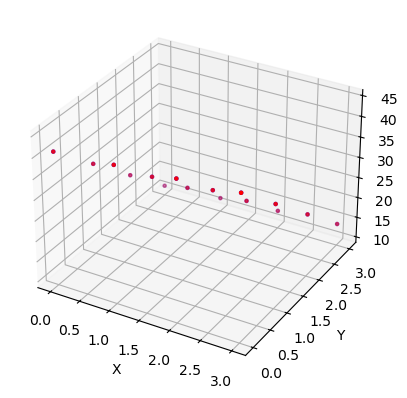

In [102]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
z_plane = a[0]*x + b[0]*y + c[0]
ax.scatter(x, y, z_plane, c='b', s=5)
ax.scatter(x, y, z, c='r', s=5)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()


In [ ]:
# finds the slope and y-intercept of the profile in the xy plan
slope = normal[1]/normal[0]
y0 = y_mean - (slope * x_mean)
    
xmin = 0
ymin = 0

# I dont know if the XMax here is user input
# It seems it's not, but then where would XMax come from
xmax = arcpy.env.extent.XMax - arcpy.env.extent.XMin
ymax = arcpy.env.extent.YMax - arcpy.env.extent.YMin

str_message = 'xmax: {}, ymax: {}, y0: {}'.format(xmax,ymax,y0)
print(str_message)